#SD204  TP SVD-PCA

###Exercice 1. Retour sur l’algèbre linéaire

In [165]:
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import os
%matplotlib inline
os.system('cls')
plt.close()

####(1)

In [166]:
mu, sigma= 0, 2
lam = 1e-5

In [167]:
#(a)
n, p = 100,2000
X = sigma * np.random.randn(n,p) + mu  # X
y = np.random.uniform(-1,1,n)          # y
Id_n = np.identity(n)                  # Id_n
Id_p = np.identity(p)                  # Id_p 
#c = np.add(a,b)
#c = np.dot(a,b)
#X_T = X.transpose()                    # X_T
#X_i = np.linalg.solve(X,Id_n)          # X_-1
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
result = np.allclose(left,right)
print result
# [the transpose of X: X.T]

True


In [168]:
#(b)
n, p = 2000,100
X = sigma * np.random.randn(n,p) + mu  # X
y = np.random.uniform(-1,1,n)          # y
Id_n = np.identity(n)                  # Id_n
Id_p = np.identity(p)                  # Id_p 
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
timeL = timeE - timeS                  #the run time of the method on left (2)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
timeR = timeE - timeS                  #the run time of the method on right (2)
result = np.allclose(left,right)
print result

True


À partir de ces resultats, on voit que l'équation suivante est vraie:
$$X^T(XX^T+{\lambda}Id_n)^{-1}y=(X^TX+{\lambda}Id_p)^{-1}X^Ty$$
####(2)  RESTE A TRAVAILLER
Ici on compare le temps d'exécution de méthode gauche et méthode droite, selon la taille de n:

In [169]:
print("Pour n = 2000, p = 100:")
print("Le temps d'exécution pour la méthode gauche est %f" %timeL)
print("Le temps d'exécution pour la méthode droite est %f" %timeR)

Pour n = 2000, p = 100:
Le temps d'exécution pour la méthode gauche est 0.160341
Le temps d'exécution pour la méthode droite est 0.000678


On voit que quand on utilise la dimention de 2000, le temps d'exécution est beaucoup plus grand que la dimention de 100. Donc on choisit l'une plus petite parmi n et p pour l’astuce du noyau.

###Exercice 2. Spectre de matrice aléatoire
####(3)
Pour cette question, la loi de poisson et la loi exponentielle sont choisies. Les moyennes sont mis nulle par moins 1 pour chaque élément dans une matrice comme ci-dessous:

In [170]:
X_poi = np.random.poisson(1, size = (n,p)) - 1
X_exp = np.random.exponential(1,size = (n,p)) - 1
#shape: k = 4  scale: theata = 0.5
#X_gam = np.random.gamma(shape = 4, scale = 0.5, size = (n,p)) -1

####(4)

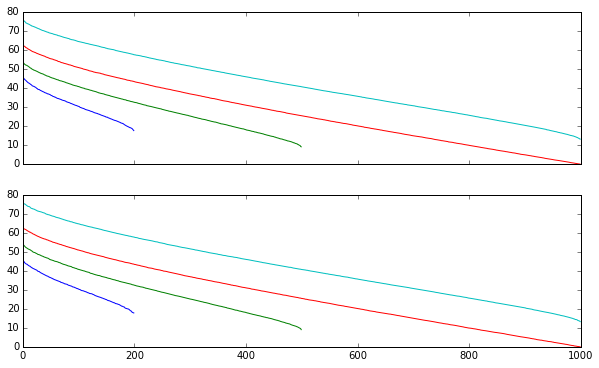

In [171]:
n = 1000
p_array = [200,500,1000,2000]
'''
figure,ax = plt.subplots(2, sharex = True)
for p in p_array:
    X_gam = np.random.gamma(shape = 4, scale = 0.5, size = (n,p)) - 2
    s_gam = np.linalg.svd(X_gam, full_matrices=1,compute_uv=0)
    ax[0].plot(s_gam)
for p in p_array:
    X_nor = np.random.randn(n,p)
    s_nor = np.linalg.svd(X_nor, full_matrices=1,compute_uv=0)
    ax[1].plot(s_nor)
'''
#figure,ax = plt.subplots(2, sharex = True)
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    s_poi = np.linalg.svd(X_poi, full_matrices=1,compute_uv=0)
    axes[0].plot(s_poi)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    s_exp = np.linalg.svd(X_exp, full_matrices=1,compute_uv=0)
    axes[1].plot(s_exp)
plt.show()

####(5) Valeurs propres

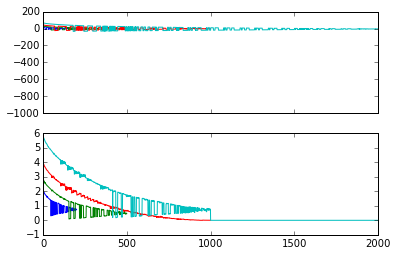

In [172]:
fig, axes = plt.subplots(2,1, sharex = True)
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    X = np.dot(X_poi.T,X_poi)/n
    evals, evecs = linalg.eig(X)
    axes[0].plot(evals)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    X = np.dot(X_exp.T,X_exp)/n
    evals, evecs = linalg.eig(X)
    axes[1].plot(evals)
plt.show()

In [173]:
#a = np.ones(shape=(5,2))
#a = np.matrix('1 2 3 4;5 6 7 8;9 8 7 6;5 4 3 2')     #<class 'numpy.matrixlib.defmatrix.matrix'>
a = np.array([[1,2,3,4], 
              [5,6,7,8],
              [9,8,7,6],
              [5,4,3,2.]])                             #<type 'numpy.ndarray'>
evals, evecs = linalg.eig(a)
print a.T*a/5
print type(a.T*a/5)

[[  0.2   2.    5.4   4. ]
 [  2.    7.2  11.2   6.4]
 [  5.4  11.2   9.8   3.6]
 [  4.    6.4   3.6   0.8]]
<type 'numpy.ndarray'>


###Exercice 3. Méthode de la puissance itérée

####(6)

In [ ]:
mu, sigma= 0, 2
n, p = 100,2000
X = sigma * np.random.randn(p,n) + mu  # X